In [2]:
import ezkl
import torch
from torch import nn
import json
import os
import time
import scipy
import numpy as np
import matplotlib.pyplot as plt
import statistics
import math

In [3]:
%run -i ../../bench.py

In [4]:
data_sm_50_path = os.path.join('data_sm_50.json')
data_sm_100_path = os.path.join('data_sm_100.json')
data_sm_300_path = os.path.join('data_sm_300.json')
data_sm_600_path = os.path.join('data_sm_600.json')
data_sm_1000_path = os.path.join('data_sm_1000.json')
data_med_50_path = os.path.join('data_med_50.json')
data_med_100_path = os.path.join('data_med_100.json')
data_med_300_path = os.path.join('data_med_300.json')
data_med_600_path = os.path.join('data_med_600.json')
data_med_1000_path = os.path.join('data_med_1000.json')
data_lar_50_path = os.path.join('data_lar_50.json')
data_lar_100_path = os.path.join('data_lar_100.json')
data_lar_300_path = os.path.join('data_lar_300.json')
data_lar_600_path = os.path.join('data_lar_600.json')
data_lar_1000_path = os.path.join('data_lar_1000.json')

In [5]:
def gen_param_func(data_tensor_array):
    # for 1 value, just have 1 element in tensor array
    data_tensor = data_tensor_array[0]
    return [torch.exp(torch.mean(torch.log(data_tensor)))]

def model_func(param):
    class verifier_model(nn.Module):
        def __init__(self):
            super(verifier_model, self).__init__()
            self.w = nn.Parameter(data = param[0], requires_grad = False)

        def forward(self,X):
            # here is witness approach
            # here for large data (100-10k), to satisfy 1% requires too big circuit, 
            # so here we use 5% deviation aka 1.05 instead of 1.01
            return (torch.abs((torch.log(self.w)*X.size()[1])-torch.sum(torch.log(X)))<=torch.log(torch.tensor(1.01)), self.w)
    return verifier_model

Summary of Proving Time (1% accuracy)

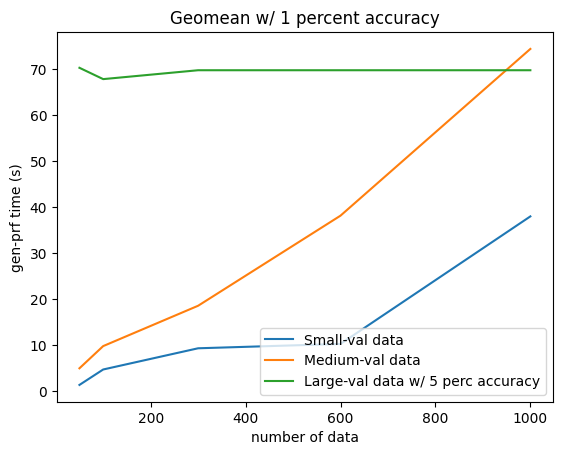

In [7]:
# Hence calibrate scale accordingly to compres the circuit size as long as the answer still within 1 percent
import matplotlib.pyplot as plt
data_number = [50, 100, 300, 600, 1000]
sm_time = [1.4092769622802734, 4.761872053146362, 9.371212005615234, 10.317855834960938, 38.031978130340576]
plt.title("Geomean w/ 1 percent accuracy")
plt.xlabel("number of data")
plt.ylabel("gen-prf time (s)")
plt.plot(data_number, sm_time, label = 'Small-val data')

med_time = [5.023013114929199, 9.846503019332886, 18.612632989883423, 38.19254398345947, 74.42504096031189]
plt.plot(data_number, med_time, label = 'Medium-val data')
# circuit of 600 and 1000 data are too big, so we put same number as in case of 100
lar_time = [70.32326078414917, 67.8628363609314, 69.79353213310242,69.79353213310242, 69.79353213310242 ]
plt.plot(data_number, lar_time, label = 'Large-val data w/ 5 perc accuracy')


plt.legend()


=============================================================================================================

Small-Valued Data: value 0-1, 3 decimals on 50, 100, 300, 600, 1000 data

In [6]:
bench_one([data_sm_50_path], model_func,gen_param_func, "50 small values",[11], "resources")

/var/folders/89/y9dw12v976ngdmqz4l7wbsnr0000gn/T/ipykernel_50051/1670920415.py:16: TracerWarning: torch.tensor results are registered as constants in the trace. You can safely ignore this warning if you use this function to create tensors out of constant variables that would be the same every time you call this function. In any other case, this might cause the trace to be incorrect.
  return (torch.abs((torch.log(self.w)*X.size()[1])-torch.sum(torch.log(X)))<=torch.log(torch.tensor(1.01)), self.w)
spawning module 0
spawning module 2


=====================================  50 small values  =====================================
setting:  {"run_args":{"tolerance":{"val":0.0,"scale":1.0},"input_scale":11,"param_scale":11,"scale_rebase_multiplier":10,"lookup_range":[-40,4080],"logrows":13,"num_inner_cols":2,"variables":[["batch_size",1]],"input_visibility":{"Hashed":{"hash_is_public":true,"outlets":[]}},"output_visibility":"Public","param_visibility":"Private"},"num_rows":3936,"total_assignments":160,"total_const_size":4,"model_instance_shapes":[[1],[1]],"model_output_scales":[0,11],"model_input_scales":[11],"module_sizes":{"kzg":[],"poseidon":[3936,[1]],"elgamal":[0,[0]]},"required_lookups":["Abs",{"Ln":{"scale":2048.0}},{"GreaterThan":{"a":0.0}}],"check_mode":"UNSAFE","version":"7.0.0","num_blinding_factors":null}


spawning module 0
spawning module 2
spawning module 0
spawning module 2


gen prf time:  1.4092769622802734
Theory result:  tensor(0.4045, dtype=torch.float64)
Our result:  [0.404296875]


In [21]:
bench_one([data_sm_100_path], model_func,gen_param_func, "100 small values",[13], "resources")

/var/folders/89/y9dw12v976ngdmqz4l7wbsnr0000gn/T/ipykernel_49648/1670920415.py:16: TracerWarning: torch.tensor results are registered as constants in the trace. You can safely ignore this warning if you use this function to create tensors out of constant variables that would be the same every time you call this function. In any other case, this might cause the trace to be incorrect.
  return (torch.abs((torch.log(self.w)*X.size()[1])-torch.sum(torch.log(X)))<=torch.log(torch.tensor(1.01)), self.w)
spawning module 0
spawning module 2


=====================================  100 small values  =====================================
setting:  {"run_args":{"tolerance":{"val":0.0,"scale":1.0},"input_scale":13,"param_scale":13,"scale_rebase_multiplier":10,"lookup_range":[-126,16384],"logrows":15,"num_inner_cols":2,"variables":[["batch_size",1]],"input_visibility":{"Hashed":{"hash_is_public":true,"outlets":[]}},"output_visibility":"Public","param_visibility":"Private"},"num_rows":6560,"total_assignments":310,"total_const_size":4,"model_instance_shapes":[[1],[1]],"model_output_scales":[0,13],"model_input_scales":[13],"module_sizes":{"kzg":[],"poseidon":[6560,[1]],"elgamal":[0,[0]]},"required_lookups":["Abs",{"Ln":{"scale":8192.0}},{"GreaterThan":{"a":0.0}}],"check_mode":"UNSAFE","version":"7.0.0","num_blinding_factors":null}


spawning module 0
spawning module 2
spawning module 0
spawning module 2


gen prf time:  4.761872053146362
Theory result:  tensor(0.3957, dtype=torch.float64)
Our result:  [0.395751953125]


In [24]:
bench_one([data_sm_300_path], model_func,gen_param_func, "300 small values",[14], "resources")

/var/folders/89/y9dw12v976ngdmqz4l7wbsnr0000gn/T/ipykernel_49648/1670920415.py:16: TracerWarning: torch.tensor results are registered as constants in the trace. You can safely ignore this warning if you use this function to create tensors out of constant variables that would be the same every time you call this function. In any other case, this might cause the trace to be incorrect.
  return (torch.abs((torch.log(self.w)*X.size()[1])-torch.sum(torch.log(X)))<=torch.log(torch.tensor(1.01)), self.w)
spawning module 0
spawning module 2


=====================================  300 small values  =====================================
setting:  {"run_args":{"tolerance":{"val":0.0,"scale":1.0},"input_scale":14,"param_scale":14,"scale_rebase_multiplier":10,"lookup_range":[-232,32702],"logrows":16,"num_inner_cols":2,"variables":[["batch_size",1]],"input_visibility":{"Hashed":{"hash_is_public":true,"outlets":[]}},"output_visibility":"Public","param_visibility":"Private"},"num_rows":14432,"total_assignments":910,"total_const_size":4,"model_instance_shapes":[[1],[1]],"model_output_scales":[0,14],"model_input_scales":[14],"module_sizes":{"kzg":[],"poseidon":[14432,[1]],"elgamal":[0,[0]]},"required_lookups":["Abs",{"Ln":{"scale":16384.0}},{"GreaterThan":{"a":0.0}}],"check_mode":"UNSAFE","version":"7.0.0","num_blinding_factors":null}


spawning module 0
spawning module 2
spawning module 0
spawning module 2


gen prf time:  9.371212005615234
Theory result:  tensor(0.3716, dtype=torch.float64)
Our result:  [0.37158203125]


In [27]:
bench_one([data_sm_600_path], model_func,gen_param_func, "600 small values",[15], "resources")

/var/folders/89/y9dw12v976ngdmqz4l7wbsnr0000gn/T/ipykernel_49648/1670920415.py:16: TracerWarning: torch.tensor results are registered as constants in the trace. You can safely ignore this warning if you use this function to create tensors out of constant variables that would be the same every time you call this function. In any other case, this might cause the trace to be incorrect.
  return (torch.abs((torch.log(self.w)*X.size()[1])-torch.sum(torch.log(X)))<=torch.log(torch.tensor(1.01)), self.w)
spawning module 0
spawning module 2


=====================================  600 small values  =====================================
setting:  {"run_args":{"tolerance":{"val":0.0,"scale":1.0},"input_scale":15,"param_scale":15,"scale_rebase_multiplier":10,"lookup_range":[-284,64618],"logrows":16,"num_inner_cols":2,"variables":[["batch_size",1]],"input_visibility":{"Hashed":{"hash_is_public":true,"outlets":[]}},"output_visibility":"Public","param_visibility":"Private"},"num_rows":26240,"total_assignments":1810,"total_const_size":4,"model_instance_shapes":[[1],[1]],"model_output_scales":[0,15],"model_input_scales":[15],"module_sizes":{"kzg":[],"poseidon":[26240,[1]],"elgamal":[0,[0]]},"required_lookups":["Abs",{"Ln":{"scale":32768.0}},{"GreaterThan":{"a":0.0}}],"check_mode":"UNSAFE","version":"7.0.0","num_blinding_factors":null}


spawning module 0
spawning module 2
spawning module 0
spawning module 2


gen prf time:  10.317855834960938
Theory result:  tensor(0.3498, dtype=torch.float64)
Our result:  [0.349853515625]


In [30]:
bench_one([data_sm_1000_path], model_func,gen_param_func, "1000 small values",[16], "resources")

=====================================  1000 small values  =====================================
setting:  {"run_args":{"tolerance":{"val":0.0,"scale":1.0},"input_scale":16,"param_scale":16,"scale_rebase_multiplier":10,"lookup_range":[-1022,131072],"logrows":18,"num_inner_cols":2,"variables":[["batch_size",1]],"input_visibility":{"Hashed":{"hash_is_public":true,"outlets":[]}},"output_visibility":"Public","param_visibility":"Private"},"num_rows":45920,"total_assignments":3010,"total_const_size":4,"model_instance_shapes":[[1],[1]],"model_output_scales":[0,16],"model_input_scales":[16],"module_sizes":{"kzg":[],"poseidon":[45920,[1]],"elgamal":[0,[0]]},"required_lookups":["Abs",{"Ln":{"scale":65536.0}},{"GreaterThan":{"a":0.0}}],"check_mode":"UNSAFE","version":"7.0.0","num_blinding_factors":null}


/var/folders/89/y9dw12v976ngdmqz4l7wbsnr0000gn/T/ipykernel_49648/1670920415.py:16: TracerWarning: torch.tensor results are registered as constants in the trace. You can safely ignore this warning if you use this function to create tensors out of constant variables that would be the same every time you call this function. In any other case, this might cause the trace to be incorrect.
  return (torch.abs((torch.log(self.w)*X.size()[1])-torch.sum(torch.log(X)))<=torch.log(torch.tensor(1.01)), self.w)
spawning module 0
spawning module 2
spawning module 0
spawning module 2
spawning module 0
spawning module 2


gen prf time:  38.031978130340576
Theory result:  tensor(0.3611, dtype=torch.float64)
Our result:  [0.361114501953125]


=============================================================================================================

Medium data: value 1-100, 1 decimal on 50, 100, 300, 600, 1000 data

In [40]:
bench_one([data_med_50_path], model_func,gen_param_func, "50 medium values",[7], "resources")

/var/folders/89/y9dw12v976ngdmqz4l7wbsnr0000gn/T/ipykernel_49648/1670920415.py:16: TracerWarning: torch.tensor results are registered as constants in the trace. You can safely ignore this warning if you use this function to create tensors out of constant variables that would be the same every time you call this function. In any other case, this might cause the trace to be incorrect.
  return (torch.abs((torch.log(self.w)*X.size()[1])-torch.sum(torch.log(X)))<=torch.log(torch.tensor(1.01)), self.w)
spawning module 0
spawning module 2


=====================================  50 medium values  =====================================
setting:  {"run_args":{"tolerance":{"val":0.0,"scale":1.0},"input_scale":7,"param_scale":7,"scale_rebase_multiplier":10,"lookup_range":[-2,25574],"logrows":15,"num_inner_cols":2,"variables":[["batch_size",1]],"input_visibility":{"Hashed":{"hash_is_public":true,"outlets":[]}},"output_visibility":"Public","param_visibility":"Private"},"num_rows":3936,"total_assignments":160,"total_const_size":4,"model_instance_shapes":[[1],[1]],"model_output_scales":[0,7],"model_input_scales":[7],"module_sizes":{"kzg":[],"poseidon":[3936,[1]],"elgamal":[0,[0]]},"required_lookups":["Abs",{"Ln":{"scale":128.0}},{"GreaterThan":{"a":0.0}}],"check_mode":"UNSAFE","version":"7.0.0","num_blinding_factors":null}


spawning module 0
spawning module 2
spawning module 0
spawning module 2


gen prf time:  5.023013114929199
Theory result:  tensor(29.6977, dtype=torch.float64)
Our result:  [29.6953125]


In [42]:
bench_one([data_med_100_path], model_func,gen_param_func, "100 medium values",[8], "resources")

/var/folders/89/y9dw12v976ngdmqz4l7wbsnr0000gn/T/ipykernel_49648/1670920415.py:16: TracerWarning: torch.tensor results are registered as constants in the trace. You can safely ignore this warning if you use this function to create tensors out of constant variables that would be the same every time you call this function. In any other case, this might cause the trace to be incorrect.
  return (torch.abs((torch.log(self.w)*X.size()[1])-torch.sum(torch.log(X)))<=torch.log(torch.tensor(1.01)), self.w)
spawning module 0
spawning module 2


=====================================  100 medium values  =====================================
setting:  {"run_args":{"tolerance":{"val":0.0,"scale":1.0},"input_scale":8,"param_scale":8,"scale_rebase_multiplier":10,"lookup_range":[-2,50432],"logrows":16,"num_inner_cols":2,"variables":[["batch_size",1]],"input_visibility":{"Hashed":{"hash_is_public":true,"outlets":[]}},"output_visibility":"Public","param_visibility":"Private"},"num_rows":6560,"total_assignments":310,"total_const_size":4,"model_instance_shapes":[[1],[1]],"model_output_scales":[0,8],"model_input_scales":[8],"module_sizes":{"kzg":[],"poseidon":[6560,[1]],"elgamal":[0,[0]]},"required_lookups":["Abs",{"Ln":{"scale":256.0}},{"GreaterThan":{"a":0.0}}],"check_mode":"UNSAFE","version":"7.0.0","num_blinding_factors":null}


spawning module 0
spawning module 2
spawning module 0
spawning module 2


gen prf time:  9.846503019332886
Theory result:  tensor(34.9273, dtype=torch.float64)
Our result:  [34.92578125]


In [44]:
bench_one([data_med_300_path], model_func,gen_param_func, "300 medium values",[9], "resources")

/var/folders/89/y9dw12v976ngdmqz4l7wbsnr0000gn/T/ipykernel_49648/1670920415.py:16: TracerWarning: torch.tensor results are registered as constants in the trace. You can safely ignore this warning if you use this function to create tensors out of constant variables that would be the same every time you call this function. In any other case, this might cause the trace to be incorrect.
  return (torch.abs((torch.log(self.w)*X.size()[1])-torch.sum(torch.log(X)))<=torch.log(torch.tensor(1.01)), self.w)
spawning module 0
spawning module 2


=====================================  300 medium values  =====================================
setting:  {"run_args":{"tolerance":{"val":0.0,"scale":1.0},"input_scale":9,"param_scale":9,"scale_rebase_multiplier":10,"lookup_range":[-6,100454],"logrows":17,"num_inner_cols":2,"variables":[["batch_size",1]],"input_visibility":{"Hashed":{"hash_is_public":true,"outlets":[]}},"output_visibility":"Public","param_visibility":"Private"},"num_rows":14432,"total_assignments":910,"total_const_size":4,"model_instance_shapes":[[1],[1]],"model_output_scales":[0,9],"model_input_scales":[9],"module_sizes":{"kzg":[],"poseidon":[14432,[1]],"elgamal":[0,[0]]},"required_lookups":["Abs",{"Ln":{"scale":512.0}},{"GreaterThan":{"a":0.0}}],"check_mode":"UNSAFE","version":"7.0.0","num_blinding_factors":null}


spawning module 0
spawning module 2
spawning module 0
spawning module 2


gen prf time:  18.612632989883423
Theory result:  tensor(39.5938, dtype=torch.float64)
Our result:  [39.59375]


In [46]:
bench_one([data_med_600_path], model_func,gen_param_func, "600 medium values",[10], "resources")

/var/folders/89/y9dw12v976ngdmqz4l7wbsnr0000gn/T/ipykernel_49648/1670920415.py:16: TracerWarning: torch.tensor results are registered as constants in the trace. You can safely ignore this warning if you use this function to create tensors out of constant variables that would be the same every time you call this function. In any other case, this might cause the trace to be incorrect.
  return (torch.abs((torch.log(self.w)*X.size()[1])-torch.sum(torch.log(X)))<=torch.log(torch.tensor(1.01)), self.w)
spawning module 0
spawning module 2


=====================================  600 medium values  =====================================
setting:  {"run_args":{"tolerance":{"val":0.0,"scale":1.0},"input_scale":10,"param_scale":10,"scale_rebase_multiplier":10,"lookup_range":[-6,204800],"logrows":18,"num_inner_cols":2,"variables":[["batch_size",1]],"input_visibility":{"Hashed":{"hash_is_public":true,"outlets":[]}},"output_visibility":"Public","param_visibility":"Private"},"num_rows":26240,"total_assignments":1810,"total_const_size":4,"model_instance_shapes":[[1],[1]],"model_output_scales":[0,10],"model_input_scales":[10],"module_sizes":{"kzg":[],"poseidon":[26240,[1]],"elgamal":[0,[0]]},"required_lookups":["Abs",{"Ln":{"scale":1024.0}},{"GreaterThan":{"a":0.0}}],"check_mode":"UNSAFE","version":"7.0.0","num_blinding_factors":null}


spawning module 0
spawning module 2
spawning module 0
spawning module 2


gen prf time:  38.19254398345947
Theory result:  tensor(37.7348, dtype=torch.float64)
Our result:  [37.734375]


In [49]:
bench_one([data_med_1000_path], model_func,gen_param_func, "1000 medium values",[11], "resources")

=====================================  1000 medium values  =====================================
setting:  {"run_args":{"tolerance":{"val":0.0,"scale":1.0},"input_scale":11,"param_scale":11,"scale_rebase_multiplier":10,"lookup_range":[-40,409600],"logrows":19,"num_inner_cols":2,"variables":[["batch_size",1]],"input_visibility":{"Hashed":{"hash_is_public":true,"outlets":[]}},"output_visibility":"Public","param_visibility":"Private"},"num_rows":45920,"total_assignments":3010,"total_const_size":4,"model_instance_shapes":[[1],[1]],"model_output_scales":[0,11],"model_input_scales":[11],"module_sizes":{"kzg":[],"poseidon":[45920,[1]],"elgamal":[0,[0]]},"required_lookups":["Abs",{"Ln":{"scale":2048.0}},{"GreaterThan":{"a":0.0}}],"check_mode":"UNSAFE","version":"7.0.0","num_blinding_factors":null}


/var/folders/89/y9dw12v976ngdmqz4l7wbsnr0000gn/T/ipykernel_49648/1670920415.py:16: TracerWarning: torch.tensor results are registered as constants in the trace. You can safely ignore this warning if you use this function to create tensors out of constant variables that would be the same every time you call this function. In any other case, this might cause the trace to be incorrect.
  return (torch.abs((torch.log(self.w)*X.size()[1])-torch.sum(torch.log(X)))<=torch.log(torch.tensor(1.01)), self.w)
spawning module 0
spawning module 2
spawning module 0
spawning module 2
spawning module 0
spawning module 2


gen prf time:  74.42504096031189
Theory result:  tensor(38.4133, dtype=torch.float64)
Our result:  [38.4130859375]


=============================================================================================================

Large-valued data: value 100-10000, 0 decimal on 50, 100, 300, 600, 1000 data

In [14]:
bench_one([data_lar_50_path], model_func,gen_param_func, "50 large values",[4], "resources")

/var/folders/89/y9dw12v976ngdmqz4l7wbsnr0000gn/T/ipykernel_50352/3734279385.py:16: TracerWarning: torch.tensor results are registered as constants in the trace. You can safely ignore this warning if you use this function to create tensors out of constant variables that would be the same every time you call this function. In any other case, this might cause the trace to be incorrect.
  return (torch.abs((torch.log(self.w)*X.size()[1])-torch.sum(torch.log(X)))<=torch.log(torch.tensor(1.05)), self.w)
spawning module 0
spawning module 2


=====================================  50 large values  =====================================
setting:  {"run_args":{"tolerance":{"val":0.0,"scale":1.0},"input_scale":4,"param_scale":4,"scale_rebase_multiplier":10,"lookup_range":[-2,319168],"logrows":19,"num_inner_cols":2,"variables":[["batch_size",1]],"input_visibility":{"Hashed":{"hash_is_public":true,"outlets":[]}},"output_visibility":"Public","param_visibility":"Private"},"num_rows":3936,"total_assignments":160,"total_const_size":4,"model_instance_shapes":[[1],[1]],"model_output_scales":[0,4],"model_input_scales":[4],"module_sizes":{"kzg":[],"poseidon":[3936,[1]],"elgamal":[0,[0]]},"required_lookups":["Abs",{"Ln":{"scale":16.0}},{"GreaterThan":{"a":0.0}}],"check_mode":"UNSAFE","version":"7.0.0","num_blinding_factors":null}


spawning module 0
spawning module 2
spawning module 0
spawning module 2


gen prf time:  70.32326078414917
Theory result:  tensor(4406.3075, dtype=torch.float64)
Our result:  [4406.3125]


In [15]:
bench_one([data_lar_100_path], model_func,gen_param_func, "100 large values",[4], "resources")

/var/folders/89/y9dw12v976ngdmqz4l7wbsnr0000gn/T/ipykernel_50352/3734279385.py:16: TracerWarning: torch.tensor results are registered as constants in the trace. You can safely ignore this warning if you use this function to create tensors out of constant variables that would be the same every time you call this function. In any other case, this might cause the trace to be incorrect.
  return (torch.abs((torch.log(self.w)*X.size()[1])-torch.sum(torch.log(X)))<=torch.log(torch.tensor(1.05)), self.w)
spawning module 0
spawning module 2


=====================================  100 large values  =====================================
setting:  {"run_args":{"tolerance":{"val":0.0,"scale":1.0},"input_scale":4,"param_scale":4,"scale_rebase_multiplier":10,"lookup_range":[0,317984],"logrows":19,"num_inner_cols":2,"variables":[["batch_size",1]],"input_visibility":{"Hashed":{"hash_is_public":true,"outlets":[]}},"output_visibility":"Public","param_visibility":"Private"},"num_rows":6560,"total_assignments":310,"total_const_size":4,"model_instance_shapes":[[1],[1]],"model_output_scales":[0,4],"model_input_scales":[4],"module_sizes":{"kzg":[],"poseidon":[6560,[1]],"elgamal":[0,[0]]},"required_lookups":["Abs",{"Ln":{"scale":16.0}},{"GreaterThan":{"a":0.0}}],"check_mode":"UNSAFE","version":"7.0.0","num_blinding_factors":null}


spawning module 0
spawning module 2
spawning module 0
spawning module 2


gen prf time:  67.8628363609314
Theory result:  tensor(3389.6629, dtype=torch.float64)
Our result:  [3389.6875]


In [16]:
bench_one([data_lar_300_path], model_func,gen_param_func, "300 large values",[4], "resources")

=====================================  300 large values  =====================================
setting:  {"run_args":{"tolerance":{"val":0.0,"scale":1.0},"input_scale":4,"param_scale":4,"scale_rebase_multiplier":10,"lookup_range":[0,319552],"logrows":19,"num_inner_cols":2,"variables":[["batch_size",1]],"input_visibility":{"Hashed":{"hash_is_public":true,"outlets":[]}},"output_visibility":"Public","param_visibility":"Private"},"num_rows":14432,"total_assignments":910,"total_const_size":4,"model_instance_shapes":[[1],[1]],"model_output_scales":[0,4],"model_input_scales":[4],"module_sizes":{"kzg":[],"poseidon":[14432,[1]],"elgamal":[0,[0]]},"required_lookups":["Abs",{"Ln":{"scale":16.0}},{"GreaterThan":{"a":0.0}}],"check_mode":"UNSAFE","version":"7.0.0","num_blinding_factors":null}


/var/folders/89/y9dw12v976ngdmqz4l7wbsnr0000gn/T/ipykernel_50352/3734279385.py:16: TracerWarning: torch.tensor results are registered as constants in the trace. You can safely ignore this warning if you use this function to create tensors out of constant variables that would be the same every time you call this function. In any other case, this might cause the trace to be incorrect.
  return (torch.abs((torch.log(self.w)*X.size()[1])-torch.sum(torch.log(X)))<=torch.log(torch.tensor(1.05)), self.w)
spawning module 0
spawning module 2
spawning module 0
spawning module 2
spawning module 0
spawning module 2


gen prf time:  69.79353213310242
Theory result:  tensor(3868.2301, dtype=torch.float64)
Our result:  [3868.25]


In [19]:
bench_one([data_lar_600_path], model_func,gen_param_func, "600 large values",[6], "resources")

=====================================  600 large values  =====================================


/var/folders/89/y9dw12v976ngdmqz4l7wbsnr0000gn/T/ipykernel_50352/3734279385.py:16: TracerWarning: torch.tensor results are registered as constants in the trace. You can safely ignore this warning if you use this function to create tensors out of constant variables that would be the same every time you call this function. In any other case, this might cause the trace to be incorrect.
  return (torch.abs((torch.log(self.w)*X.size()[1])-torch.sum(torch.log(X)))<=torch.log(torch.tensor(1.05)), self.w)
spawning module 0
spawning module 2


setting:  {"run_args":{"tolerance":{"val":0.0,"scale":1.0},"input_scale":6,"param_scale":6,"scale_rebase_multiplier":10,"lookup_range":[-2,1279104],"logrows":21,"num_inner_cols":2,"variables":[["batch_size",1]],"input_visibility":{"Hashed":{"hash_is_public":true,"outlets":[]}},"output_visibility":"Public","param_visibility":"Private"},"num_rows":26240,"total_assignments":1810,"total_const_size":4,"model_instance_shapes":[[1],[1]],"model_output_scales":[0,6],"model_input_scales":[6],"module_sizes":{"kzg":[],"poseidon":[26240,[1]],"elgamal":[0,[0]]},"required_lookups":["Abs",{"Ln":{"scale":64.0}},{"GreaterThan":{"a":0.0}}],"check_mode":"UNSAFE","version":"7.0.0","num_blinding_factors":null}


spawning module 0
spawning module 2


RuntimeError: Failed to run setup: No space left on device (os error 28)

In [26]:
bench_one([data_lar_1000_path], model_func,gen_param_func, "1000 large values",[0], "resources")

spawning module 0


=====================================  1000 large values  =====================================
setting:  {"run_args":{"tolerance":{"val":0.0,"scale":1.0},"input_scale":0,"param_scale":0,"scale_rebase_multiplier":10,"lookup_range":[-101974,0],"logrows":17,"num_inner_cols":2,"variables":[["batch_size",1]],"input_visibility":{"Hashed":{"hash_is_public":true,"outlets":[]}},"output_visibility":"Public","param_visibility":"Private"},"num_rows":45920,"total_assignments":2010,"total_const_size":4,"model_instance_shapes":[[1],[1]],"model_output_scales":[0,0],"model_input_scales":[0],"module_sizes":{"kzg":[],"poseidon":[45920,[1]],"elgamal":[0,[0]]},"required_lookups":["Abs",{"GreaterThan":{"a":0.0}}],"check_mode":"UNSAFE","version":"7.0.0","num_blinding_factors":null}


spawning module 2
spawning module 0
spawning module 2
spawning module 0
spawning module 2


gen prf time:  17.28679895401001
Theory result:  tensor(5098.7080, dtype=torch.float64)
Our result:  [5099.0]
